In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as pl
from netCDF4 import Dataset
import open_xarray as ox

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 12

ds=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb2nd_1024_150m_8km_50.nc')
ds2=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb2nd_1024_150m_8km_150.nc')
ds3=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb2nd_1024_150m_8km_400.nc')
ds4=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb2nd_1024_150m_8km_700.nc')
ds5=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb2nd_1024_150m_jan31_8km_10/eurec4a.default.0000000.nc')
ds6=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Increased_SST/eurec4a.default.0000000.nc')
ds_smooth=ds.rolling(time=12).mean()
ds2_smooth=ds2.rolling(time=12).mean()
ds3_smooth=ds3.rolling(time=12).mean()
ds4_smooth=ds4.rolling(time=12).mean()
ds5_smooth=ds5.rolling(time=12).mean()
ds6_smooth=ds6.rolling(time=12).mean()



label1='50e6'
label2='150e6'
label3='400e6'
label4='700e6'
label5='10e6'



/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs

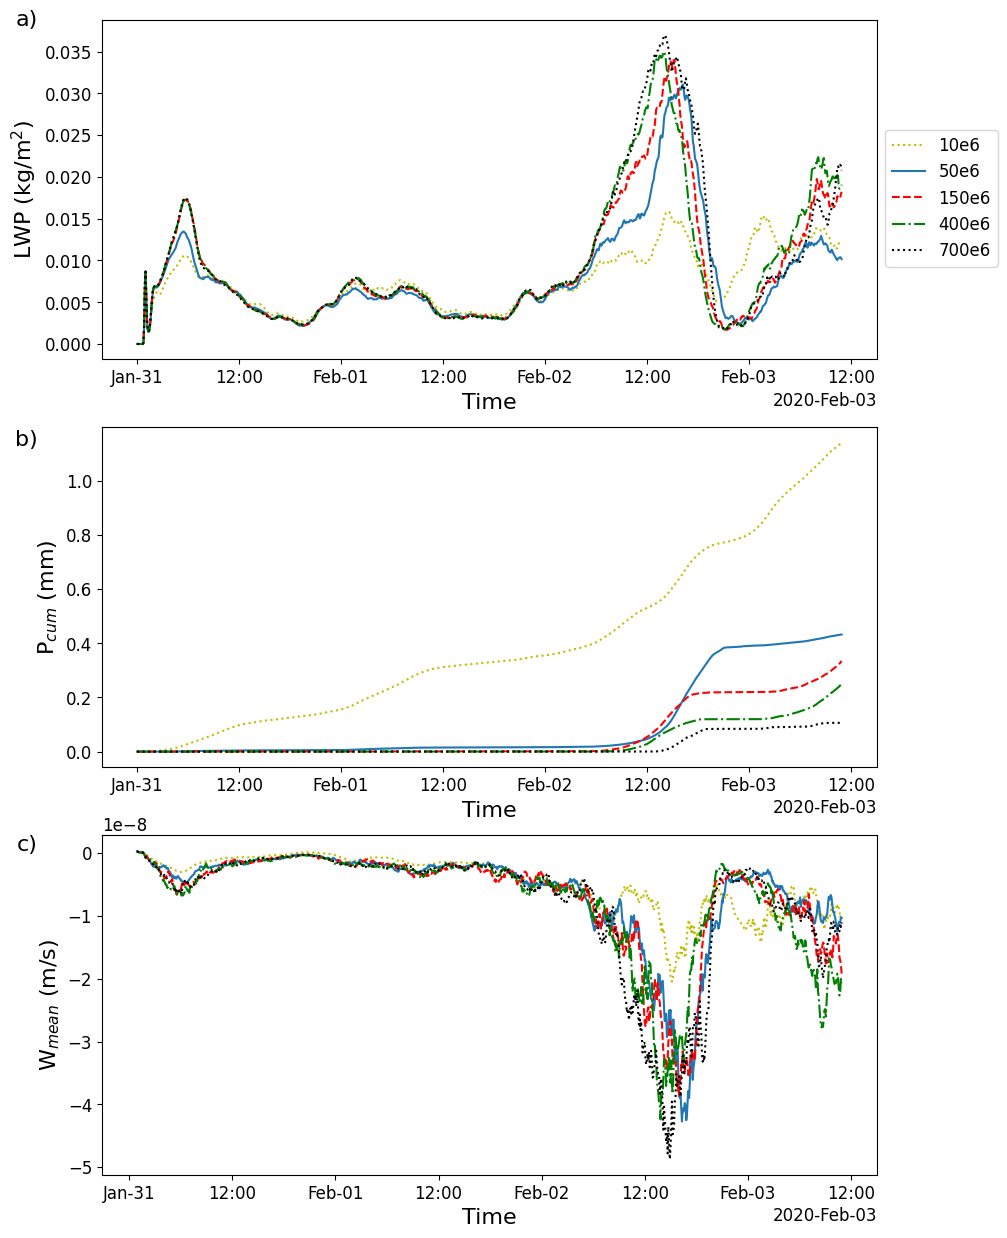

In [56]:
fig, axs = pl.subplots(3, 1, figsize=(10, 15))
pl.subplot(311)
ds5.ql_path.plot.line('y:',x='time',label=label5)
ds.ql_path.plot.line(x='time',label=label1)
ds2.ql_path.plot.line('r--',x='time',label=label2)
ds3.ql_path.plot.line('g-.',x='time',label=label3)
ds4.ql_path.plot.line('k:',x='time',label=label4)
pl.ylabel(r'LWP (kg/m$^{2}$)')
#pl.xticks([])
#pl.xlabel('')
#pl.show()

pl.subplot(312)
(ds5['rr']*300).cumsum().plot.line('y:',x='time',label=label5)
(ds['rr']*300).cumsum().plot.line(x='time',label=label1)
(ds2['rr']*300).cumsum().plot.line('r--',x='time',label=label2)
(ds3['rr']*300).cumsum().plot.line('g-.',x='time',label=label3)
(ds4['rr']*300).cumsum().plot.line('k:',x='time',label=label4)
pl.ylabel(r'P$_{cum}$ (mm)')
#pl.show()
#pl.xticks([])
#pl.xlabel('')

pl.subplot(313)
ds5_smooth.sel(z=slice(0,600)).w.mean('zh').plot.line('y:',x='time',label=label5)
ds_smooth.sel(z=slice(0,600)).w.mean('zh').plot.line(x='time',label=label1)
ds2_smooth.sel(z=slice(0,600)).w.mean('zh').plot.line('r--',x='time',label=label2)
ds3_smooth.sel(z=slice(0,600)).w.mean('zh').plot.line('g-.',x='time',label=label3)
ds4_smooth.sel(z=slice(0,600)).w.mean('zh').plot.line('k:',x='time',label=label4)
pl.legend(loc='upper left',bbox_to_anchor=(1, 3.1))
pl.ylabel(r'W$_{mean}$ (m/s)')
pl.figtext(0.05, 0.88, 'a)', ha='center', va='center', fontsize=16)
pl.figtext(0.05, 0.6, 'b)', ha='center', va='center', fontsize=16)
pl.figtext(0.05, 0.33, 'c)', ha='center', va='center', fontsize=16)

pl.savefig('/users/PFS0220/graghuna/Flower_MIP_Paper/Plots/Cloud_droplet_number_concentration_Feb2nd.jpg',dpi=300, bbox_inches='tight')

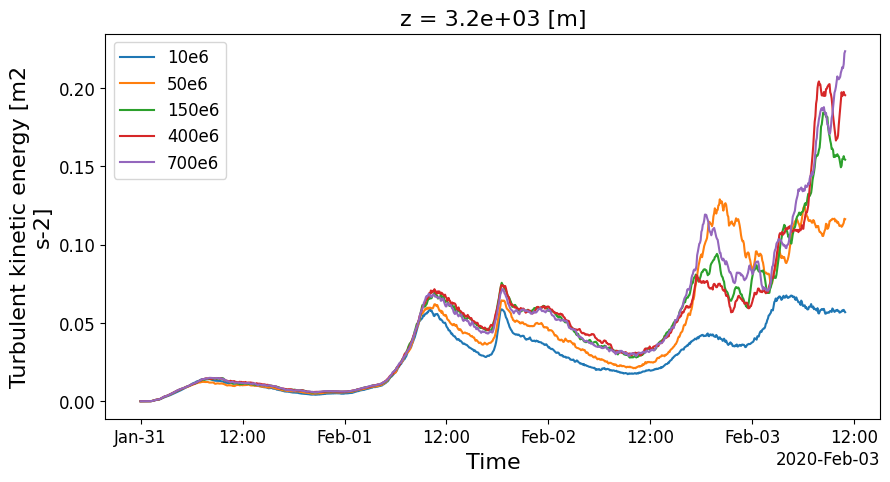

In [3]:
pl.figure(figsize=(10,5))
ds5.tke.sel(z=3200).plot(label='10e6')
ds.tke.sel(z=3200).plot(label='50e6')
ds2.tke.sel(z=3200).plot(label='150e6')
ds3.tke.sel(z=3200).plot(label='400e6')
ds4.tke.sel(z=3200).plot(label='700e6')
pl.legend()

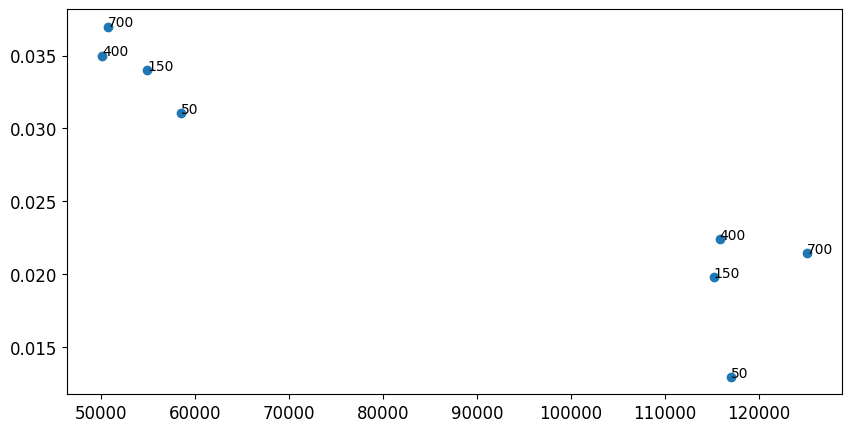

In [26]:
output = {'1':ds,'2':ds2,'3':ds3,'4':ds4}
nc0=['50','150','400','700']

time = np.zeros(8)
peak_ql = np.zeros(8)
i=0
for key in output:
    time[i] = (output[key]['time'].where(output[key]['ql_path']==output[key]['ql_path'].max(),drop=True)-output[key]['time'][0]).dt.seconds.values
    peak_ql[i] = output[key]['ql_path'].max().values
    time[i+len(nc0)] = (output[key]['time'].where(output[key]['ql_path']==output[key]['ql_path'].isel(time=slice(int(72*3600/300),None)).max(),drop=True)\
                        -output[key]['time'][0]).dt.seconds.values + 86400 
    peak_ql[i+len(nc0)] = output[key]['ql_path'].isel(time=slice(int(72*3600/300),None)).max().values
    i=i+1

fig,ax = pl.subplots(figsize=(10,5))
ax.scatter(time,peak_ql)
for i, txt in enumerate(np.concatenate((nc0,nc0))):
    ax.annotate(txt, (time[i],peak_ql[i]))

In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as pl
from netCDF4 import Dataset
import open_xarray as ox

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 12

ds=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb9_1024_150m_8km_10/eurec4a.default.0000000.nc')
ds2=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb9_1024_150m_8km_50/eurec4a.default.0000000.nc')
ds3=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb9_1024_150m_8km_150/eurec4a.default.0000000.nc')
ds4=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb9_1024_150m_8km_400/eurec4a.default.0000000.nc')
ds5=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb9_1024_150m_8km_700/eurec4a.default.0000000.nc')
ds_smooth=ds.rolling(time=12).mean()
ds2_smooth=ds2.rolling(time=12).mean()
ds3_smooth=ds3.rolling(time=12).mean()
ds4_smooth=ds4.rolling(time=12).mean()
ds5_smooth=ds5.rolling(time=12).mean()
ds6_smooth=ds6.rolling(time=12).mean()


label1='10e6'
label2='50e6'
label3='150e6'
label4='400e6'
label5='700e6'






/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs/local/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/users/PFS0220/graghuna/.conda/envs

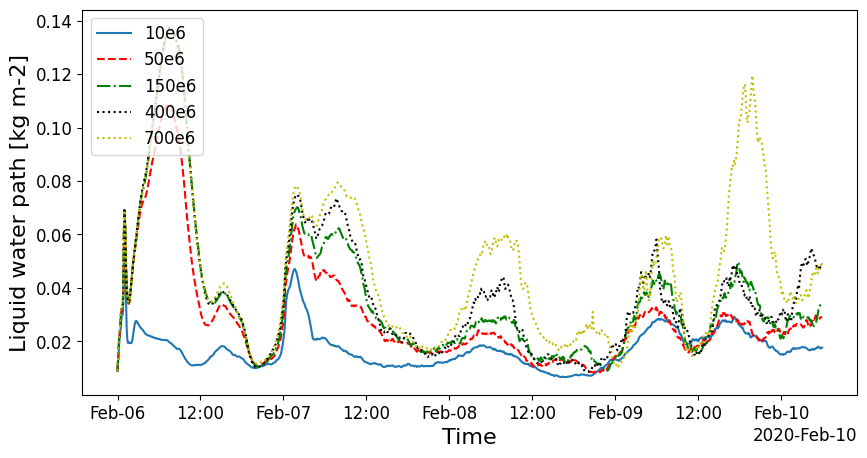

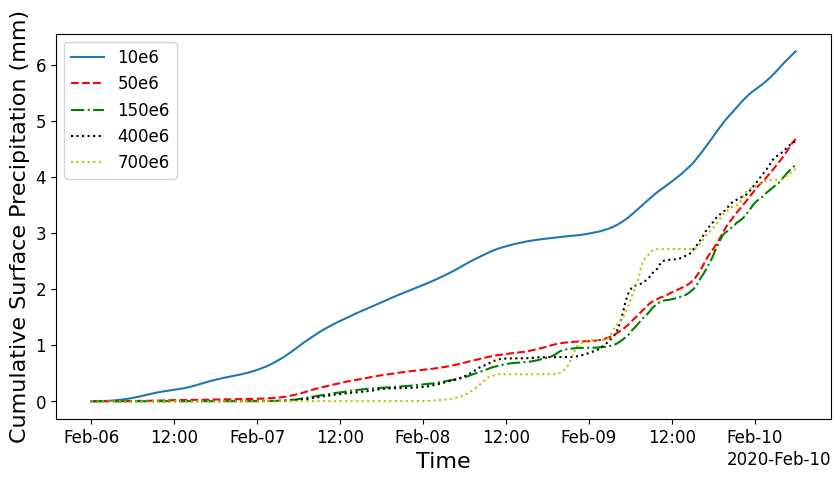

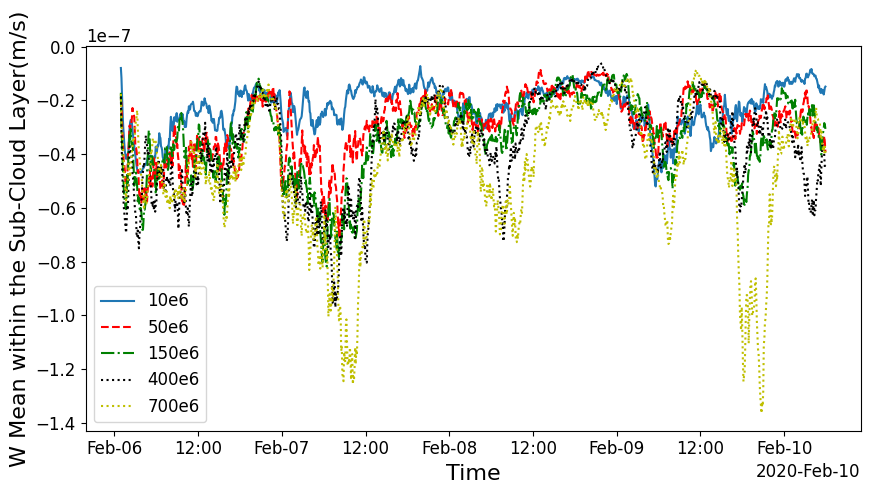

In [20]:
pl.figure(figsize=(10,5))
ds.ql_path.plot.line(x='time',label=label1)
ds2.ql_path.plot.line('r--',x='time',label=label2)
ds3.ql_path.plot.line('g-.',x='time',label=label3)
ds4.ql_path.plot.line('k:',x='time',label=label4)
ds5.ql_path.plot.line('y:',x='time',label=label5)
#pl.ylim(-0.005,0.13)
pl.legend(loc='upper left')

pl.figure(figsize=(10,5))

(ds['rr']*300).cumsum().plot.line(x='time',label=label1)
(ds2['rr']*300).cumsum().plot.line('r--',x='time',label=label2)
(ds3['rr']*300).cumsum().plot.line('g-.',x='time',label=label3)
(ds4['rr']*300).cumsum().plot.line('k:',x='time',label=label4)
(ds5['rr']*300).cumsum().plot.line('y:',x='time',label=label5)
#pl.ylim(-0.005,0.13)
pl.ylabel('Cumulative Surface Precipitation (mm)')
pl.legend()
pl.savefig('/users/PFS0220/graghuna/Flower_MIP_Paper/Plots/Cloud_droplet_number_concentration_cumRR.jpg',dpi=300)
#pl.yscale('log')

pl.figure(figsize=(10,5))

ds_smooth.sel(z=slice(0,600)).w.mean('zh').plot.line(x='time',label=label1)
ds2_smooth.sel(z=slice(0,600)).w.mean('zh').plot.line('r--',x='time',label=label2)
ds3_smooth.sel(z=slice(0,600)).w.mean('zh').plot.line('g-.',x='time',label=label3)
ds4_smooth.sel(z=slice(0,600)).w.mean('zh').plot.line('k:',x='time',label=label4)
ds5_smooth.sel(z=slice(0,600)).w.mean('zh').plot.line('y:',x='time',label=label5)
pl.legend()
pl.ylabel('W Mean within the Sub-Cloud Layer(m/s)')
pl.savefig('/users/PFS0220/graghuna/Flower_MIP_Paper/Plots/Cloud_droplet_number_concentration_wsum.jpg',dpi=300)
def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power( np.linspace(start, stop, num=num), power)
#pl.figure(figsize=(10,5))
#ds5.ql.plot.contourf(x='time',levels=powspace(1e-7,7e-4,2,10))